In [5]:
import warnings
warnings.filterwarnings("ignore")

In [6]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier

In [16]:
data = pd.read_csv(r"C:\Kishore\Data Analysis\breast-cancer.csv")
data.tail(10)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
559,925291,B,11.51,23.93,74.52,403.5,0.09261,0.10210,0.11120,0.04105,...,37.16,82.28,474.2,0.12980,0.25170,0.3630,0.09653,0.2112,0.08732,NaN
560,925292,B,14.05,27.15,91.38,600.4,0.09929,0.11260,0.04462,0.04304,...,33.17,100.20,706.7,0.12410,0.22640,0.1326,0.10480,0.2250,0.08321,NaN
561,925311,B,11.20,29.37,70.67,386.0,0.07449,0.03558,0.00000,0.00000,...,38.30,75.19,439.6,0.09267,0.05494,0.0000,0.00000,0.1566,0.05905,NaN
562,925622,M,15.22,30.62,103.40,716.9,0.10480,0.20870,0.25500,0.09429,...,42.79,128.70,915.0,0.14170,0.79170,1.1700,0.23560,0.4089,0.14090,NaN
563,926125,M,20.92,25.09,143.00,1347.0,0.10990,0.22360,0.31740,0.14740,...,29.41,179.10,1819.0,0.14070,0.41860,0.6599,0.25420,0.2929,0.09873,NaN
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.22160,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.16280,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.14180,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.26500,0.4087,0.12400,NaN
568,92751,B,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,...,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.00000,0.2871,0.07039,NaN


In [8]:
data = data.drop('Unnamed: 32', axis=1)

In [9]:
from sklearn.preprocessing import LabelEncoder

In [10]:
le = LabelEncoder()
data['diagnosis'] = le.fit_transform(data['diagnosis'])

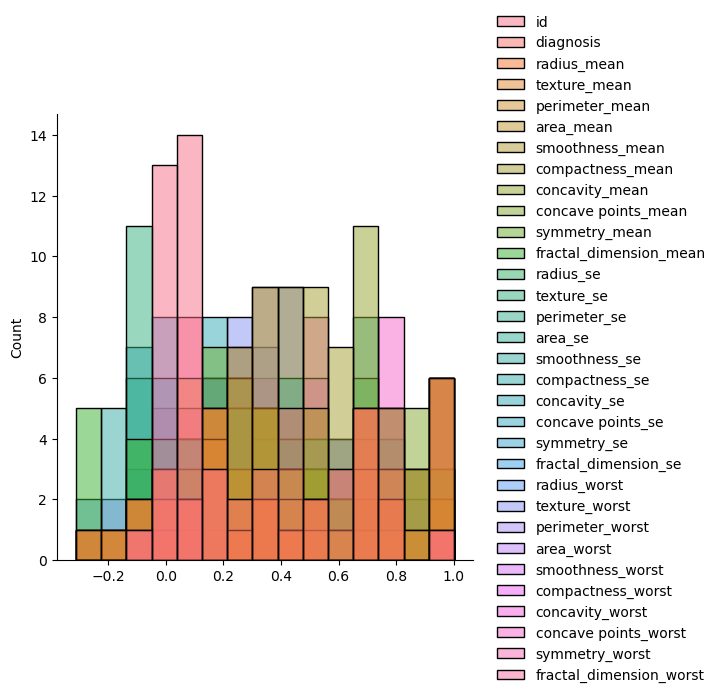

In [11]:
corr = data.corr()
sns.displot(corr)

In [12]:
X = data[['radius_mean', 'texture_mean', 'perimeter_mean']]
y = data['diagnosis']
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.20, random_state=3)
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train,y_train)
scr=knn.score(X_test,y_test)
print("Score for your model is ",scr)

Score for your model is  0.9298245614035088


In [13]:
res=knn.predict([[120,6.0,8.4]])
if res==1:
    print("M")
else:
    print("B")

B


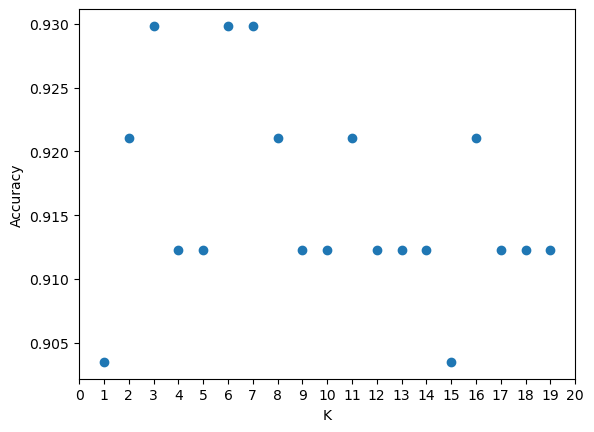

In [14]:
k_range = range(1,20)
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    scores.append(knn.score(X_test, y_test))
plt.figure()
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.scatter(k_range, scores)
plt.xticks([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]);